#### **Install Library**

In [1]:
pip install PySastrawi

In [2]:
pip install WordCloud

#### **Import Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string

from wordcloud import WordCloud
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('stopwords')
stop = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### **Load Dataset**

In [0]:
df = pd.read_excel('https://raw.githubusercontent.com/farhanalfaa/twitter-sentiment-analysis/master/dataset/5000_tweets.xlsx', index_col = 0)

In [5]:
df.shape

(5036, 4)

In [6]:
df.tail()

,screen_name,username,text,label
5031,haremarem,agnostheis,"Hidup dimasa revolusi industri, kaya latar vio...",0
5032,haremarem,agnostheis,Kapan jembatan ki isa sepi kang bocahpic.twitt...,-1
5033,haremarem,agnostheis,Testimoni pesugihan online nya guys?pic.twitte...,-1
5034,haremarem,agnostheis,Agama sudah diperkontenkan bukan lagi diperjua...,1
5035,haremarem,agnostheis,"Mau jadi diaspora, yg study pake beasiswa nega...",0


**Create a New Dataset without Unrelated Data**

In [0]:
pos_tweet = df['label'] == 1
neu_tweet = df['label'] == 0
neg_tweet = df['label'] == -1

new_df = (df[(pos_tweet) | (neg_tweet) | (neu_tweet)])

In [0]:
new_df = new_df[['text', 'label']]

In [9]:
new_df.shape

(3662, 2)

#### **Checking Nan Values**

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3662 entries, 0 to 5035
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3662 non-null   object
 1   label   3662 non-null   object
dtypes: object(2)
memory usage: 85.8+ KB


#### **Character and Word Visualization**



In [0]:
char_len = new_df['text'].str.len()
word_len = new_df['text'].str.split().map(lambda x: len(x))

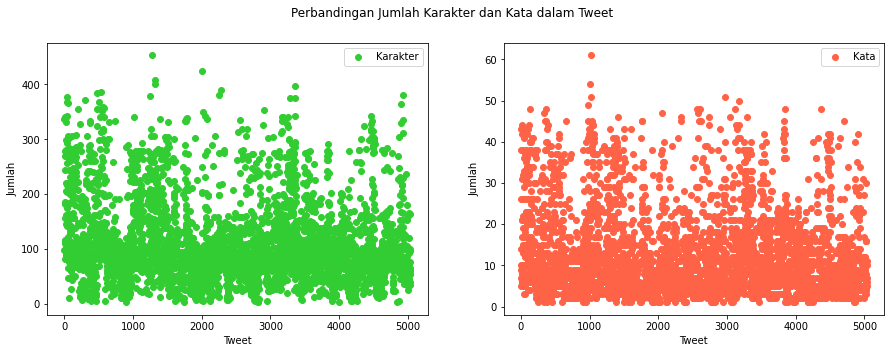

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Perbandingan Jumlah Karakter dan Kata dalam Tweet')

ax1.scatter(char_len.index, char_len.values, color='limegreen', label='Karakter')
ax1.set_xlabel('Tweet')
ax1.set_ylabel('Jumlah')
ax1.legend()

ax2.scatter(word_len.index, word_len.values, color='tomato', label='Kata')
ax2.set_xlabel('Tweet')
ax2.set_ylabel('Jumlah')
ax2.legend()

plt.show()

## **Data Preprocessing**

**Remove URL, Mention Tag, Hashtag, and Numbering**

In [0]:
text_list = new_df['text'].tolist()

def remove_tag(text):
  text = re.sub(r'pic.twitter\S+', '', text)
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'@\S+', '', text)
  text = re.sub(r'#\S+', '', text)
  text = re.sub('\d+', '', text)
  return text

tag_output = [remove_tag(sen) for sen in text_list]

new_df['without_tag'] = tag_output

In [14]:
new_df.head()

,text,label,without_tag
0,Laporan pandangan mata langsung dari TKPhttps:...,0,Laporan pandangan mata langsung dari TKP …
1,Sayangnya ada sekelompok orang yang sedang dip...,-1,Sayangnya ada sekelompok orang yang sedang dip...
2,Negara kita akan segera menjadi negara yang sa...,1,Negara kita akan segera menjadi negara yang sa...
3,Kayaknya Dokdes @ryuhasan pernah bikin thread ...,0,"Kayaknya Dokdes pernah bikin thread ini, ya? …"
4,Aku milih NASI MATERAIhttps://twitter.com/eko_...,0,Aku milih NASI MATERAI …


**Spell Checker**

In [0]:
def spell_checker(text):
  pattern = re.compile(r'(.)\1{2,}')
  text = pattern.sub(r'\1\1', text)
  return text

spell_check = [spell_checker(sen) for sen in tag_output]

new_df['reduce_lenghtening'] = spell_check

In [16]:
new_df.head()

,text,label,without_tag,reduce_lenghtening
0,Laporan pandangan mata langsung dari TKPhttps:...,0,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …
1,Sayangnya ada sekelompok orang yang sedang dip...,-1,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...
2,Negara kita akan segera menjadi negara yang sa...,1,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...
3,Kayaknya Dokdes @ryuhasan pernah bikin thread ...,0,"Kayaknya Dokdes pernah bikin thread ini, ya? …","Kayaknya Dokdes pernah bikin thread ini, ya? …"
4,Aku milih NASI MATERAIhttps://twitter.com/eko_...,0,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …


**Remove Punctuation**

In [0]:
punct = list(string.punctuation)

def remove_punc(text):
  for punctuation in punct:
    text = text.replace(punctuation, ' ')
  return text

punct_output = [remove_punc(sen) for sen in spell_check]

new_df['without_punc'] = punct_output

In [18]:
new_df.head()

,text,label,without_tag,reduce_lenghtening,without_punc
0,Laporan pandangan mata langsung dari TKPhttps:...,0,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …
1,Sayangnya ada sekelompok orang yang sedang dip...,-1,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...
2,Negara kita akan segera menjadi negara yang sa...,1,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...
3,Kayaknya Dokdes @ryuhasan pernah bikin thread ...,0,"Kayaknya Dokdes pernah bikin thread ini, ya? …","Kayaknya Dokdes pernah bikin thread ini, ya? …",Kayaknya Dokdes pernah bikin thread ini ya …
4,Aku milih NASI MATERAIhttps://twitter.com/eko_...,0,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …


**Lowercase Process**

In [0]:
def to_lowercase(text):
  return text.lower() 

lower_text = [to_lowercase(sen) for sen in punct_output]

new_df['to_lowercase'] = lower_text

In [20]:
new_df.head()

,text,label,without_tag,reduce_lenghtening,without_punc,to_lowercase
0,Laporan pandangan mata langsung dari TKPhttps:...,0,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,laporan pandangan mata langsung dari tkp …
1,Sayangnya ada sekelompok orang yang sedang dip...,-1,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,sayangnya ada sekelompok orang yang sedang dip...
2,Negara kita akan segera menjadi negara yang sa...,1,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,negara kita akan segera menjadi negara yang sa...
3,Kayaknya Dokdes @ryuhasan pernah bikin thread ...,0,"Kayaknya Dokdes pernah bikin thread ini, ya? …","Kayaknya Dokdes pernah bikin thread ini, ya? …",Kayaknya Dokdes pernah bikin thread ini ya …,kayaknya dokdes pernah bikin thread ini ya …
4,Aku milih NASI MATERAIhttps://twitter.com/eko_...,0,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,aku milih nasi materai …


**Stemming Process**

In [0]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_preprocessing(sens):
  return stemmer.stem(sens)

stem_output = [stemming_preprocessing(sen) for sen in lower_text]

new_df['stemming'] = stem_output

In [22]:
new_df.head()

,text,label,without_tag,reduce_lenghtening,without_punc,to_lowercase,stemming
0,Laporan pandangan mata langsung dari TKPhttps:...,0,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,laporan pandangan mata langsung dari tkp …,lapor pandang mata langsung dari tkp
1,Sayangnya ada sekelompok orang yang sedang dip...,-1,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,sayangnya ada sekelompok orang yang sedang dip...,sayang ada kelompok orang yang sedang pakai ge...
2,Negara kita akan segera menjadi negara yang sa...,1,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,negara kita akan segera menjadi negara yang sa...,negara kita akan segera jadi negara yang sanga...
3,Kayaknya Dokdes @ryuhasan pernah bikin thread ...,0,"Kayaknya Dokdes pernah bikin thread ini, ya? …","Kayaknya Dokdes pernah bikin thread ini, ya? …",Kayaknya Dokdes pernah bikin thread ini ya …,kayaknya dokdes pernah bikin thread ini ya …,kayak dokdes pernah bikin thread ini ya
4,Aku milih NASI MATERAIhttps://twitter.com/eko_...,0,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,aku milih nasi materai …,aku milih nasi materai


**Tokenize**

In [0]:
token = new_df['stemming'].str.split()
token_list = token.values.tolist()

new_df['tokenize'] = token_list

In [24]:
new_df.head()

,text,label,without_tag,reduce_lenghtening,without_punc,to_lowercase,stemming,tokenize
0,Laporan pandangan mata langsung dari TKPhttps:...,0,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,laporan pandangan mata langsung dari tkp …,lapor pandang mata langsung dari tkp,"[lapor, pandang, mata, langsung, dari, tkp]"
1,Sayangnya ada sekelompok orang yang sedang dip...,-1,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,sayangnya ada sekelompok orang yang sedang dip...,sayang ada kelompok orang yang sedang pakai ge...,"[sayang, ada, kelompok, orang, yang, sedang, p..."
2,Negara kita akan segera menjadi negara yang sa...,1,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,negara kita akan segera menjadi negara yang sa...,negara kita akan segera jadi negara yang sanga...,"[negara, kita, akan, segera, jadi, negara, yan..."
3,Kayaknya Dokdes @ryuhasan pernah bikin thread ...,0,"Kayaknya Dokdes pernah bikin thread ini, ya? …","Kayaknya Dokdes pernah bikin thread ini, ya? …",Kayaknya Dokdes pernah bikin thread ini ya …,kayaknya dokdes pernah bikin thread ini ya …,kayak dokdes pernah bikin thread ini ya,"[kayak, dokdes, pernah, bikin, thread, ini, ya]"
4,Aku milih NASI MATERAIhttps://twitter.com/eko_...,0,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,aku milih nasi materai …,aku milih nasi materai,"[aku, milih, nasi, materai]"


**Words Frequency**

In [0]:
from nltk.probability import FreqDist

result = []
for sublist in token_list:
    for item in sublist:
        result.append(item)

In [0]:
before_stopwords = nltk.FreqDist(result)

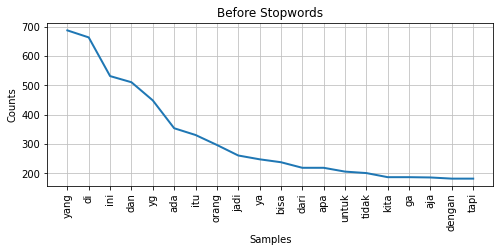

In [27]:
fig, ax = plt.subplots(figsize=(8,3))

before_stopwords.plot(20,cumulative=False, title='Before Stopwords')

plt.show()

**Remove Stopwords**

In [0]:
stoplist     = stopwords.words('indonesian')
new_stoplist = ['yg', 'kalo', 'aja', 'gw', 'udah', 'ken', 'gin', 'klo', 'sih', 'nih'] 

stoplist.extend(new_stoplist)

stoplist.remove('tidak')

In [0]:
def remove_stopwords(tokens):
  return [word for word in tokens if word not in stoplist]

stopwords_output = [remove_stopwords(sen) for sen in token_list]

new_df['without_stopwords'] = stopwords_output

In [30]:
new_df.head()

,text,label,without_tag,reduce_lenghtening,without_punc,to_lowercase,stemming,tokenize,without_stopwords
0,Laporan pandangan mata langsung dari TKPhttps:...,0,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,Laporan pandangan mata langsung dari TKP …,laporan pandangan mata langsung dari tkp …,lapor pandang mata langsung dari tkp,"[lapor, pandang, mata, langsung, dari, tkp]","[lapor, pandang, mata, langsung, tkp]"
1,Sayangnya ada sekelompok orang yang sedang dip...,-1,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,Sayangnya ada sekelompok orang yang sedang dip...,sayangnya ada sekelompok orang yang sedang dip...,sayang ada kelompok orang yang sedang pakai ge...,"[sayang, ada, kelompok, orang, yang, sedang, p...","[sayang, kelompok, orang, pakai, gerak, hancur..."
2,Negara kita akan segera menjadi negara yang sa...,1,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,Negara kita akan segera menjadi negara yang sa...,negara kita akan segera menjadi negara yang sa...,negara kita akan segera jadi negara yang sanga...,"[negara, kita, akan, segera, jadi, negara, yan...","[negara, negara, hitung, utopia, wujud, nyata,..."
3,Kayaknya Dokdes @ryuhasan pernah bikin thread ...,0,"Kayaknya Dokdes pernah bikin thread ini, ya? …","Kayaknya Dokdes pernah bikin thread ini, ya? …",Kayaknya Dokdes pernah bikin thread ini ya …,kayaknya dokdes pernah bikin thread ini ya …,kayak dokdes pernah bikin thread ini ya,"[kayak, dokdes, pernah, bikin, thread, ini, ya]","[kayak, dokdes, bikin, thread, ya]"
4,Aku milih NASI MATERAIhttps://twitter.com/eko_...,0,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,Aku milih NASI MATERAI …,aku milih nasi materai …,aku milih nasi materai,"[aku, milih, nasi, materai]","[milih, nasi, materai]"


In [0]:
from nltk.probability import FreqDist

result = []
for sublist in stopwords_output:
    for item in sublist:
        result.append(item)

In [0]:
after_stopwords = nltk.FreqDist(result)

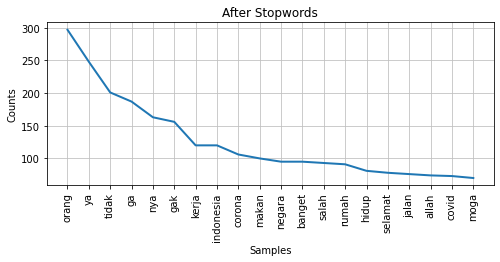

In [33]:
fig, ax = plt.subplots(figsize=(8,3))

after_stopwords.plot(20,cumulative=False, title='After Stopwords')

plt.show()

## **Result Cleaning Process**

In [0]:
result = [' '.join(sen) for sen in stopwords_output]

new_df['clean_text'] = result
new_df = new_df[['clean_text', 'label']]

In [35]:
new_df.head()

,clean_text,label
0,lapor pandang mata langsung tkp,0
1,sayang kelompok orang pakai gerak hancur kerja...,-1
2,negara negara hitung utopia wujud nyata nikel ...,1
3,kayak dokdes bikin thread ya,0
4,milih nasi materai,0


### **WordCloud Visualization**

**Show Negative Word Cloud**

In [0]:
neg_tweets = new_df[new_df.label == -1]
neg_string = []

for word in neg_tweets.clean_text:
  neg_string.append(word)

neg_string = pd.Series(neg_string).str.cat(sep=' ')

**Show Neutral Word Cloud**

In [0]:
neu_tweets = new_df[new_df.label == 0]
neu_string = []

for word in neu_tweets.clean_text:
  neu_string.append(word)

neu_string = pd.Series(neu_string).str.cat(sep=' ')

**Show Positive Word Cloud**

In [0]:
pos_tweets = new_df[new_df.label == 1]
pos_string = []

for word in pos_tweets.clean_text:
  pos_string.append(word)

pos_string = pd.Series(pos_string).str.cat(sep=' ')

**Visualization WordCloud**

In [0]:
wordcloud1 = WordCloud(width = 1800,
                      height = 800,
                      background_color='white',
                      max_font_size = 200).generate(neg_string)

wordcloud2 = WordCloud(width = 1800,
                      height = 800,
                      background_color='white',
                      max_font_size = 200).generate(neu_string)

wordcloud3 = WordCloud(width = 1800,
                      height = 800,
                      background_color='white',
                      max_font_size = 200).generate(pos_string)

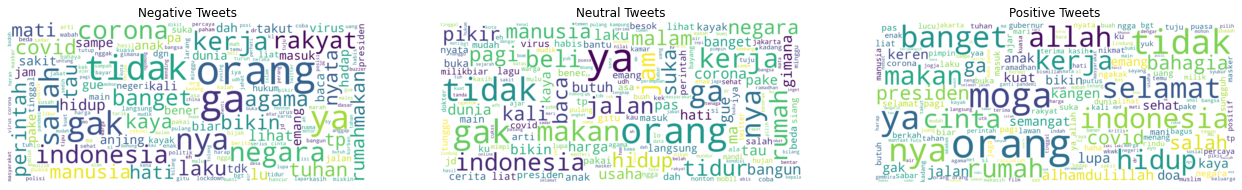

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 12))

ax1.imshow(wordcloud1, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Negative Tweets')

ax2.imshow(wordcloud2, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Neutral Tweets')

ax3.imshow(wordcloud3, interpolation='bilinear')
ax3.axis('off')
ax3.set_title('Positive Tweets')

plt.show()


### **Train Test Split**

In [0]:
X = new_df['clean_text']
y = new_df['label']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.2,
                                                     random_state=42)

In [0]:
train_pos_length = (len(X_train[y_train == -1]) / (len(X_train)*1.))*100
train_neu_length = (len(X_train[y_train == 0]) / (len(X_train)*1.))*100
train_neg_length = (len(X_train[y_train == 1]) / (len(X_train)*1.))*100

test_pos_length = (len(X_test[y_test == -1]) / (len(X_test)*1.))*100
test_neu_length = (len(X_test[y_test == 0]) / (len(X_test)*1.))*100
test_neg_length = (len(X_test[y_test == 1]) / (len(X_test)*1.))*100

In [44]:
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% neutral, {3:.2f}% positive".format(len(X_train),
                                                                             train_neg_length,
                                                                             train_neu_length,
                                                                             train_pos_length))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% neutral, {3:.2f}% positive".format(len(X_test),
                                                                             test_neg_length,
                                                                             test_neu_length,
                                                                             test_pos_length))

Train set has total 2929 entries with 28.61% negative, 34.11% neutral, 37.28% positive
Test set has total 733 entries with 32.33% negative, 33.56% neutral, 34.11% positive


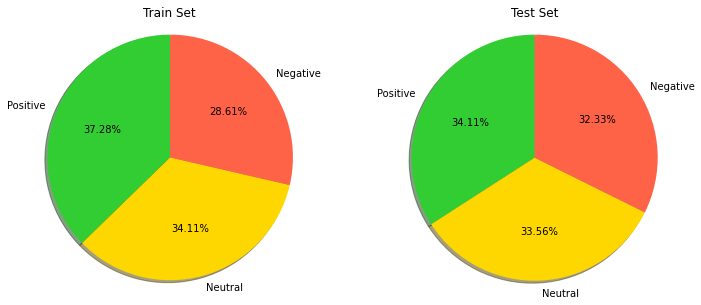

In [45]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive', 'Neutral',  'Negative'
colors = ['limegreen', 'gold', 'tomato']

train_sizes = [train_pos_length, train_neu_length, train_neg_length]
test_sizes  = [test_pos_length, test_neu_length, test_neg_length]

explode = (0, 0, 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.pie(train_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Train Set')

ax2.pie(test_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title('Test Set')

plt.show()

In [0]:
train_data = {'text' : X_train,
              'label': y_train}

test_data  = {'text' : X_test,
              'label': y_test}

In [0]:
train_df = pd.DataFrame(train_data)
test_df  = pd.DataFrame(test_data)

### **Export to Excel File**

In [0]:
from google.colab import files

train_df.to_excel('train.xlsx') 
files.download('train.xlsx')

test_df.to_excel('test.xlsx') 
files.download('test.xlsx')